# predict credit card approval

In [ ]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 4.6 MB/s eta 0:00:00


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
### To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# imbalance data set librariy
import imblearn
from collections import Counter

In [ ]:
#Importing MYsql libraries!
import mysql.connector as mysql
myconn = mysql.connect(host='127.0.0.1',database='credit_analys', user='root', password='babai06')

In [ ]:
from pandasql import sqldf 

In [ ]:
#Meachinelearning 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree
import xgboost as xgb

In [ ]:
df1=pd.read_csv("Credit_card.csv")

In [ ]:
df2=pd.read_csv("Credit_card_label.csv")

In [ ]:
display(df1,df2)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [ ]:
df=pd.merge(df1,df2)

In [ ]:
credit_card=df.copy()

In [ ]:
credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
credit_card.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
credit_card.describe(include= 'all')

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [ ]:
credit_card.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

array([[<AxesSubplot:title={'center':'Ind_ID'}>,
        <AxesSubplot:title={'center':'CHILDREN'}>,
        <AxesSubplot:title={'center':'Annual_income'}>],
       [<AxesSubplot:title={'center':'Birthday_count'}>,
        <AxesSubplot:title={'center':'Employed_days'}>,
        <AxesSubplot:title={'center':'Mobile_phone'}>],
       [<AxesSubplot:title={'center':'Work_Phone'}>,
        <AxesSubplot:title={'center':'Phone'}>,
        <AxesSubplot:title={'center':'EMAIL_ID'}>],
       [<AxesSubplot:title={'center':'Family_Members'}>,
        <AxesSubplot:title={'center':'label'}>, <AxesSubplot:>]],
      dtype=object)

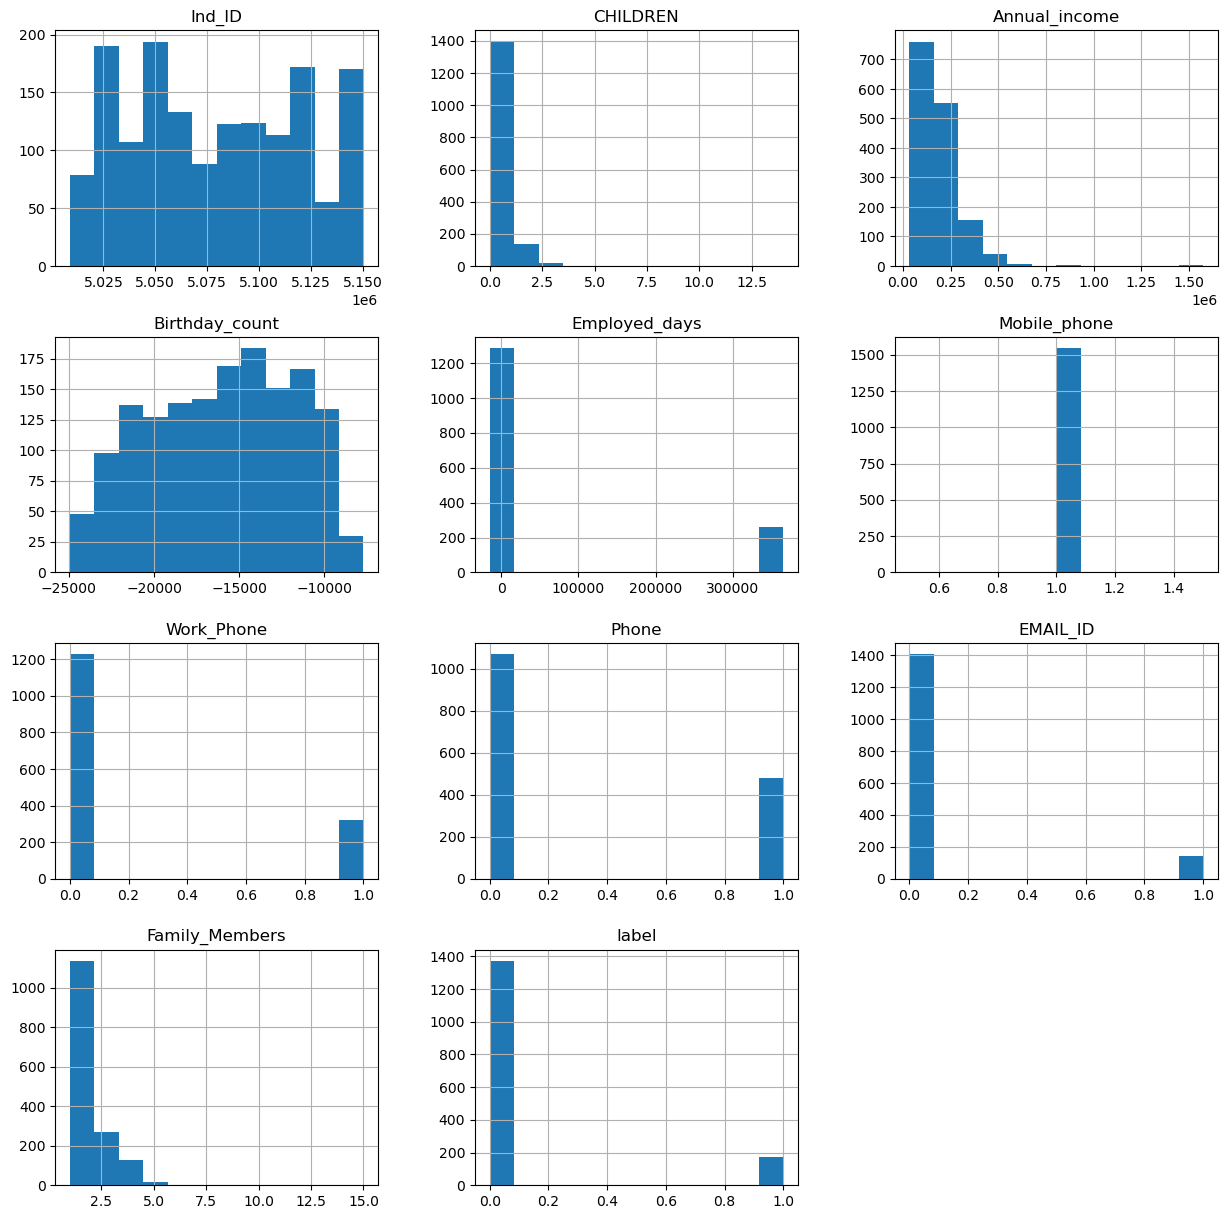

In [ ]:
credit_card.hist(bins=12,figsize=(15,15))

In [ ]:
#assigning index with Ind_ID
credit_card.index = credit_card ['Ind_ID']
credit_card.drop('Ind_ID',axis=1,inplace=True)

In [ ]:
credit_card.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
Ind_ID,,,,,,,,,,,,,,,,,,
5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
#cheking duplicate
bool_series = credit_card.duplicated()
bool_series

Ind_ID
5008827    False
5009744    False
5009746    False
5009749    False
5009752     True
           ...  
5028645    False
5023655    False
5115992     True
5118219    False
5053790    False
Length: 1548, dtype: bool

In [ ]:
#removing duplicate
credit_card.drop_duplicates(inplace=True)

In [ ]:
credit_card.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
Ind_ID,,,,,,,,,,,,,,,,,,
5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
credit_card.describe()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1386.000000,1.363000e+03,1364.000000,1386.000000,1386.0,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,0.424242,1.894781e+05,-16033.953812,60265.073593,1.0,0.204906,0.310967,0.094517,2.176046,0.098846
std,0.792813,1.069330e+05,4216.837346,138577.322363,0.0,0.403779,0.463056,0.292652,0.960236,0.298562
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19543.000000,-3153.750000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.620000e+05,-15611.500000,-1542.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12445.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
#checking the unique value
for i in credit_card.columns:
    print(i,'-',credit_card[i].unique)

GENDER - <bound method Series.unique of Ind_ID
5008827      M
5009744      F
5009746      F
5009749      F
5009753    NaN
          ... 
5118268      M
5028645      F
5023655      F
5118219      M
5053790      F
Name: GENDER, Length: 1386, dtype: object>
Car_Owner - <bound method Series.unique of Ind_ID
5008827    Y
5009744    Y
5009746    Y
5009749    Y
5009753    Y
          ..
5118268    Y
5028645    N
5023655    N
5118219    Y
5053790    Y
Name: Car_Owner, Length: 1386, dtype: object>
Propert_Owner - <bound method Series.unique of Ind_ID
5008827    Y
5009744    N
5009746    N
5009749    N
5009753    N
          ..
5118268    N
5028645    Y
5023655    N
5118219    N
5053790    Y
Name: Propert_Owner, Length: 1386, dtype: object>
CHILDREN - <bound method Series.unique of Ind_ID
5008827    0
5009744    0
5009746    0
5009749    0
5009753    0
          ..
5118268    1
5028645    0
5023655    0
5118219    0
5053790    0
Name: CHILDREN, Length: 1386, dtype: int64>
Annual_income - <bound 

In [ ]:
#use type_casting to convert the suitable data_type
credit_card['GENDER']=credit_card['GENDER'].astype('category')
credit_card['Car_Owner']=credit_card['Car_Owner'].astype('category')
credit_card['Propert_Owner']=credit_card['Propert_Owner'].astype('category')
credit_card['Type_Income']=credit_card['Type_Income'].astype('category')
credit_card['EDUCATION']=credit_card['EDUCATION'].astype('category')
credit_card['Marital_status']=credit_card['Marital_status'].astype('category')
credit_card['Housing_type']=credit_card['Housing_type'].astype('category')
credit_card['Mobile_phone']=credit_card['Mobile_phone'].astype('category')
credit_card['Work_Phone']=credit_card['Work_Phone'].astype('category')
credit_card['Phone']=credit_card['Phone'].astype('category')
credit_card['EMAIL_ID']=credit_card['EMAIL_ID'].astype('category')
credit_card['Type_Occupation']=credit_card['Type_Occupation'].astype('category')


In [ ]:
#getting 'age' and 'working_days' from 'birthdy_count' and 'employed_days'
credit_card['Age']=-(credit_card['Birthday_count'])//365
credit_card['Working_Period']=-(credit_card['Employed_days'])//365

In [ ]:
credit_card.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Working_Period
Ind_ID,,,,,,,,,,,,,,,,,,,,
5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,51.0,-1001
5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.0,1
5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,NaN,1
5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.0,1
5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.0,1


In [ ]:
#replacing working days '-1001' with 1
credit_card['Working_Period']=credit_card['Working_Period'].replace(-1001,1)

In [ ]:
credit_card.describe()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,label,Age,Working_Period
count,1386.000000,1.363000e+03,1364.000000,1386.000000,1386.000000,1386.000000,1364.000000,1386.000000
mean,0.424242,1.894781e+05,-16033.953812,60265.073593,2.176046,0.098846,43.417155,5.763348
std,0.792813,1.069330e+05,4216.837346,138577.322363,0.960236,0.298562,11.552161,6.314866
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000,0.000000,21.000000,0.000000
25%,0.000000,1.215000e+05,-19543.000000,-3153.750000,2.000000,0.000000,34.000000,1.000000
50%,0.000000,1.620000e+05,-15611.500000,-1542.500000,2.000000,0.000000,42.000000,4.000000
75%,1.000000,2.250000e+05,-12445.000000,-412.000000,3.000000,0.000000,53.000000,8.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,15.000000,1.000000,68.000000,40.000000


In [ ]:
credit_card.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Working_Period
Ind_ID,,,,,,,,,,,,,,,,,,,,
5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,51.0,1
5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.0,1
5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,NaN,1
5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.0,1
5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.0,1


In [ ]:
credit_card.drop(['Birthday_count','Employed_days'],axis=1,inplace=True)

In [ ]:
credit_card.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Working_Period
Ind_ID,,,,,,,,,,,,,,,,,,
5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,1,51.0,1
5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1
5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,NaN,1
5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1
5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1


In [ ]:
#credit_card.rename(columns={'Working_days':'Working_Period'},inplace=True)
#credit_card.head()

In [ ]:
credit_card.isnull().sum()

GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    438
Family_Members       0
label                0
Age                 22
Working_Period       0
dtype: int64

In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 5008827 to 5053790
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GENDER           1379 non-null   category
 1   Car_Owner        1386 non-null   category
 2   Propert_Owner    1386 non-null   category
 3   CHILDREN         1386 non-null   int64   
 4   Annual_income    1363 non-null   float64 
 5   Type_Income      1386 non-null   category
 6   EDUCATION        1386 non-null   category
 7   Marital_status   1386 non-null   category
 8   Housing_type     1386 non-null   category
 9   Mobile_phone     1386 non-null   category
 10  Work_Phone       1386 non-null   category
 11  Phone            1386 non-null   category
 12  EMAIL_ID         1386 non-null   category
 13  Type_Occupation  948 non-null    category
 14  Family_Members   1386 non-null   int64   
 15  label            1386 non-null   int64   
 16  Age              1364 non-null   

# Exploratory Data Analysis
Checking out messing Data!


# Missing Data
use seaborn to check missing data!

<AxesSubplot:ylabel='Ind_ID'>

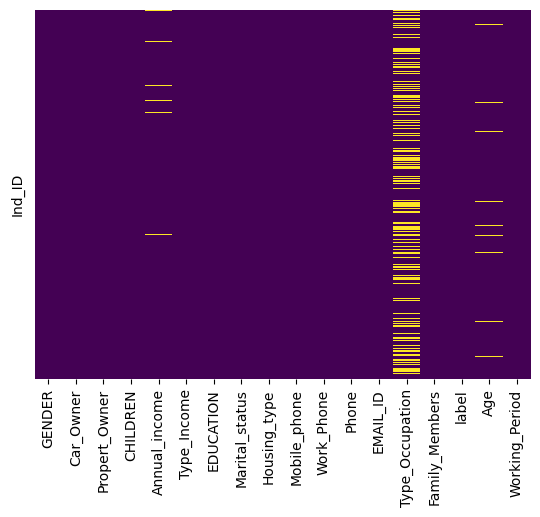

In [ ]:
sns.heatmap(credit_card.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
credit_card.isnull().sum() * 100 / credit_card.shape[0]

GENDER              0.505051
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.659452
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.601732
Family_Members      0.000000
label               0.000000
Age                 1.587302
Working_Period      0.000000
dtype: float64

We Can Observe That Roufghly :
1).5% data missing in 'gender'
2)1.6% data missing in 'annual income'
3)31% data missing in 'Occupation type'
4)1.5% data missing in 'Age'

<AxesSubplot:>

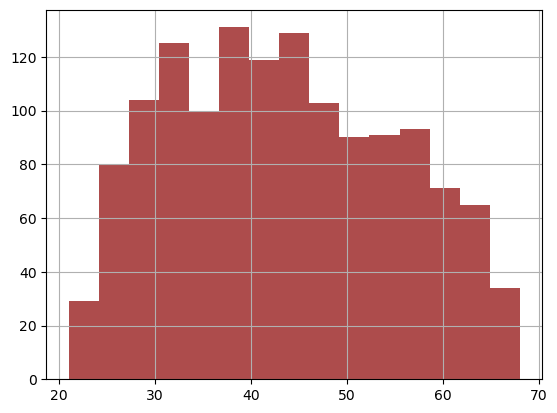

In [ ]:
credit_card['Age'].hist(bins=15,color='darkred',alpha=0.7)


<AxesSubplot:xlabel='GENDER', ylabel='Age'>

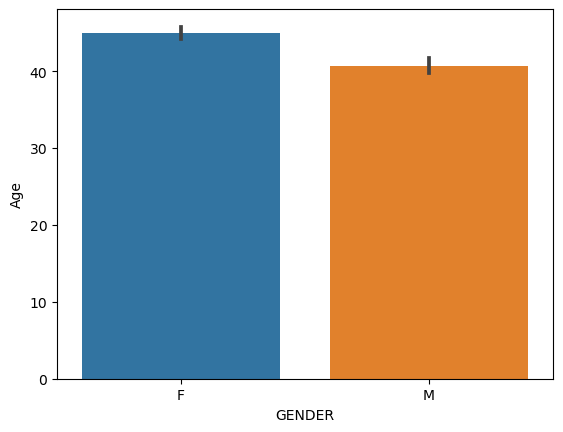

In [ ]:
sns.barplot(data=credit_card, x="GENDER", y="Age")

# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the customer.

<AxesSubplot:xlabel='Age'>

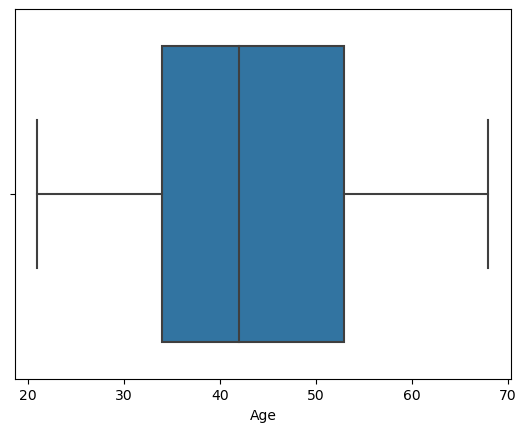

In [ ]:
sns.boxplot(x='Age',data=credit_card)

In [ ]:
credit_card.isnull().sum()

GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    438
Family_Members       0
label                0
Age                 22
Working_Period       0
dtype: int64

In [ ]:
#replace missing values with mean(imputation)!
credit_card["Age"].fillna(credit_card["Age"].mean(),inplace=True)

<AxesSubplot:xlabel='Annual_income'>

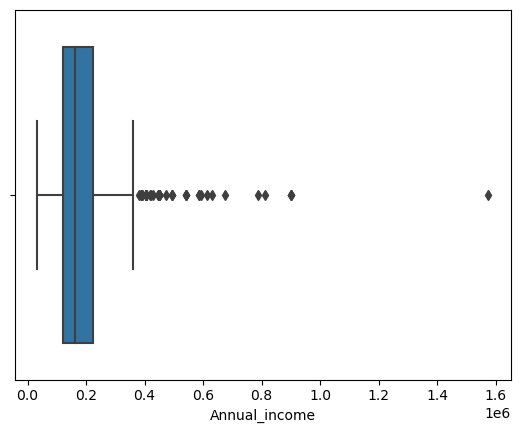

In [ ]:
#checking 'anual income'
sns.boxplot(x="Annual_income",data=credit_card)

In [ ]:
credit_card["Annual_income"].describe()

count    1.363000e+03
mean     1.894781e+05
std      1.069330e+05
min      3.375000e+04
25%      1.215000e+05
50%      1.620000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Annual_income, dtype: float64

In [ ]:
#Replacing missing value with mean(imputation)!
credit_card["Annual_income"].fillna(credit_card["Annual_income"].mean(),inplace=True)

In [ ]:
#replaces the missing values of a particular column with the value from previous row
credit_card["GENDER"]=credit_card["GENDER"].fillna(method='ffill')

In [ ]:
#Type_Occupation has 30% null value so we drop it
credit_card.drop('Type_Occupation',axis=1,inplace=True)

<AxesSubplot:ylabel='Ind_ID'>

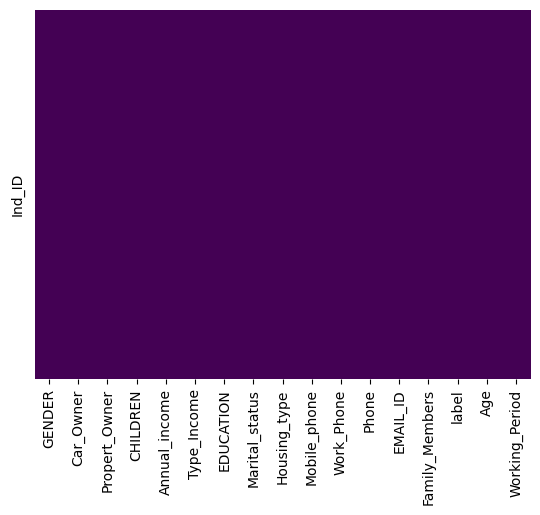

In [ ]:
sns.heatmap(credit_card.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
credit_card.isnull().sum()

GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
Age               0
Working_Period    0
dtype: int64

# Checking skewness

In [ ]:
credit_card.skew()

CHILDREN          4.750842
Annual_income     3.357465
Family_Members    2.332374
label             2.691124
Age               0.180341
Working_Period    1.892667
dtype: float64

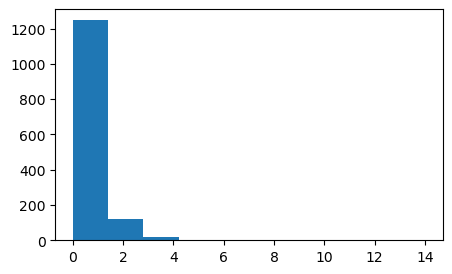

In [ ]:
plt.figure(figsize=[5,3])
plt.hist(data= credit_card, x='CHILDREN')
plt.show()

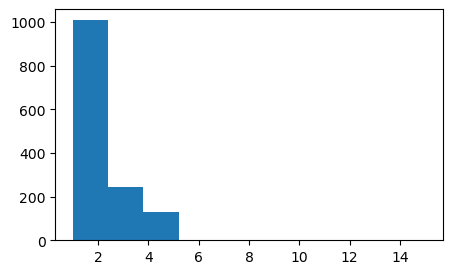

In [ ]:
plt.figure(figsize=[5,3])
plt.hist(data= credit_card, x='Family_Members')
plt.show()

We can observe that there is corelation between 'children' and 'Family membera' !

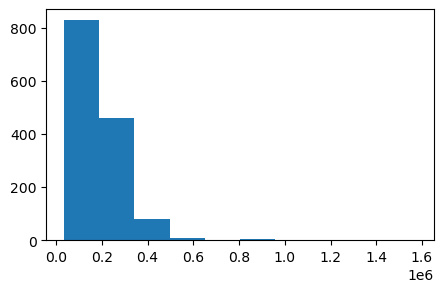

In [ ]:
plt.figure(figsize=[5,3])
plt.hist(data= credit_card, x='Annual_income')
plt.show()

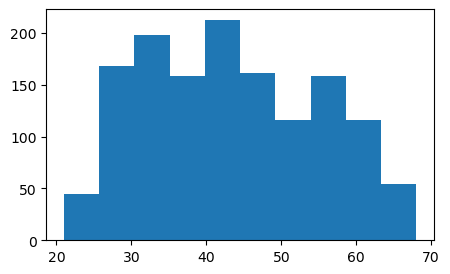

In [ ]:
plt.figure(figsize=[5,3])
plt.hist(data= credit_card, x='Age')
plt.show()

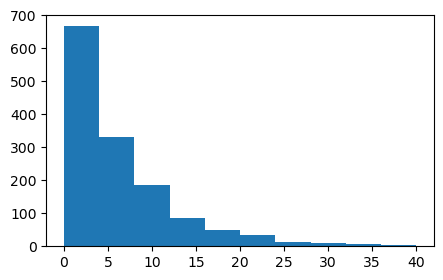

In [ ]:
plt.figure(figsize=[5,3])
plt.hist(data= credit_card, x='Working_Period')
plt.show()

In [ ]:
credit_card.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members',
       'label', 'Age', 'Working_Period'],
      dtype='object')

# Checking the distribution using graphical interface

Use the CountPlot to observe the each categorical bins. !

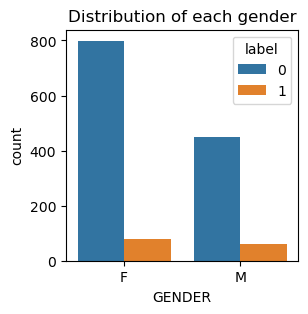

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='GENDER', data=credit_card,hue='label')
plt.title('Distribution of each gender')
plt.show()

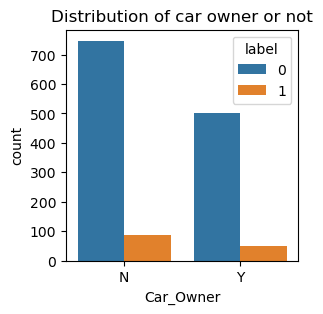

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Car_Owner', data=credit_card,hue='label')
plt.title('Distribution of car owner or not')
plt.show()

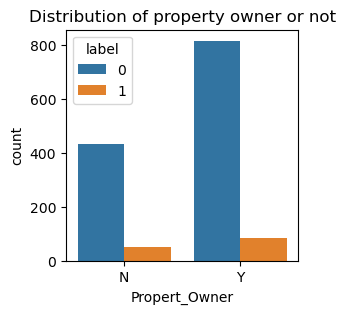

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Propert_Owner', data=credit_card,hue='label')
plt.title('Distribution of property owner or not')
plt.show()

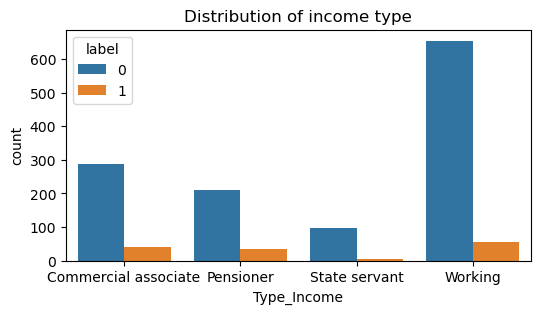

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x='Type_Income', data=credit_card,hue='label')
plt.title('Distribution of income type')
plt.show()

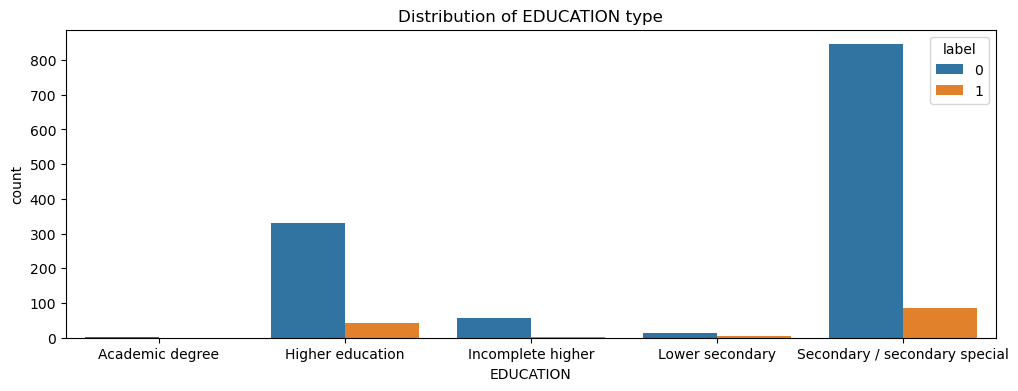

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='EDUCATION', data=credit_card,hue='label')
plt.title('Distribution of EDUCATION type')
plt.show()

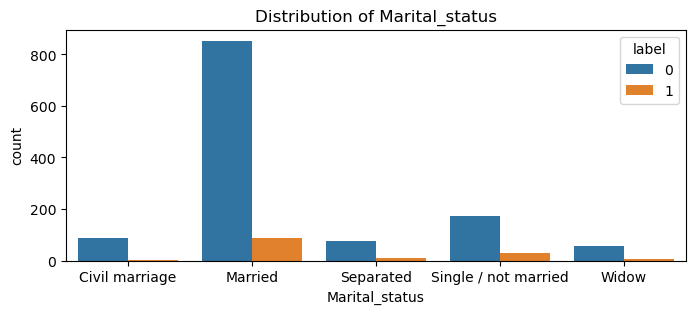

In [ ]:
plt.figure(figsize=(,3))
sns.countplot(x='Marital_status', data=credit_card,hue='label')
plt.title('Distribution of Marital_status')
plt.show()

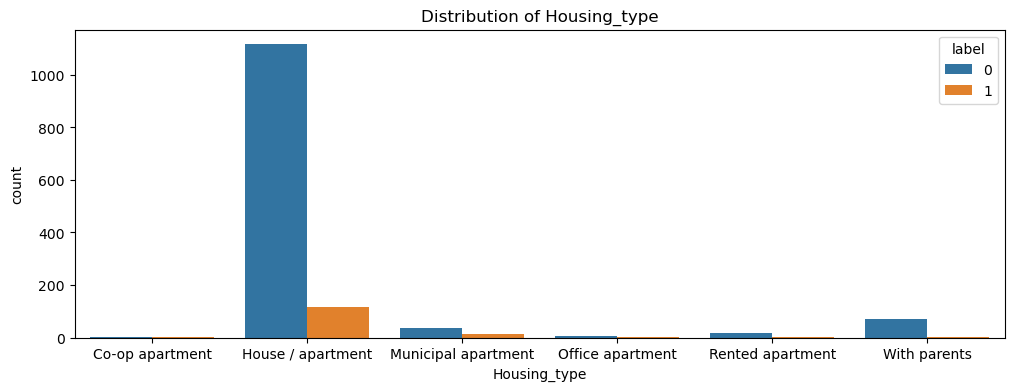

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='Housing_type', data=credit_card,hue='label')
plt.title('Distribution of Housing_type')
plt.show()

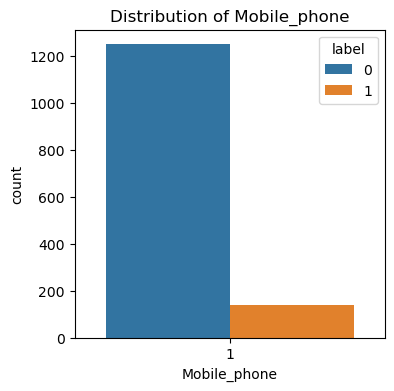

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x='Mobile_phone', data=credit_card,hue='label')
plt.title('Distribution of Mobile_phone')
plt.show()

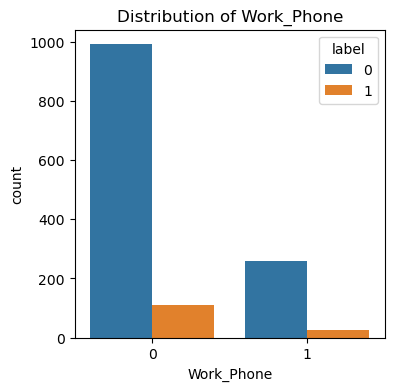

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x='Work_Phone', data=credit_card,hue='label')
plt.title('Distribution of Work_Phone')
plt.show()

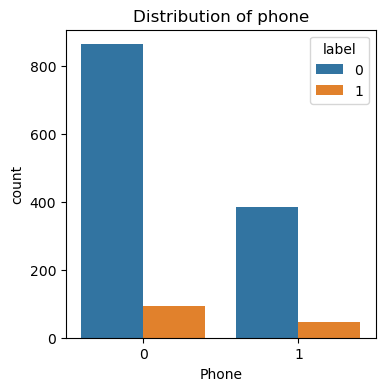

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x='Phone', data=credit_card,hue='label')
plt.title('Distribution of phone')
plt.show()

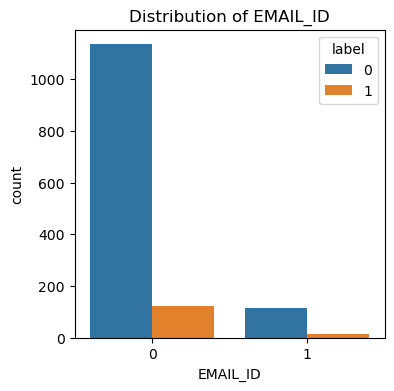

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x='EMAIL_ID', data=credit_card,hue='label')
plt.title('Distribution of EMAIL_ID')
plt.show()

# Checking the terget variable

<AxesSubplot:xlabel='label', ylabel='count'>

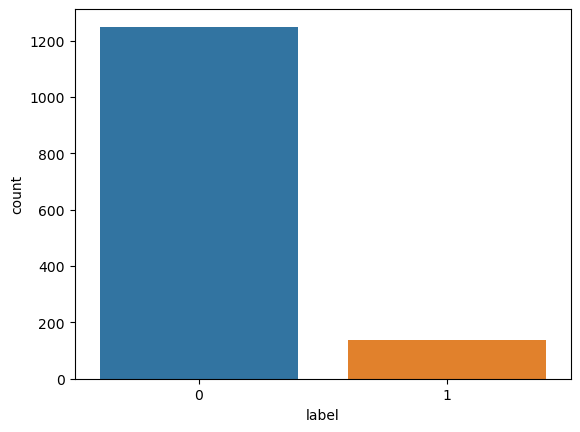

In [ ]:
sns.countplot(x=credit_card["label"])

In [ ]:
credit_card["label"].value_counts()

0    1249
1     137
Name: label, dtype: int64

We can observe that it is a imblanced data,most of the application is approved.

In [ ]:
#split the datset into 'x' nd 'y' variable
X=credit_card.drop(["label"],axis=1)    #drop only last 'label' column
y=credit_card["label"]       #perticularly select 'label' and asign to y

In [ ]:
y.value_counts()

0    1249
1     137
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

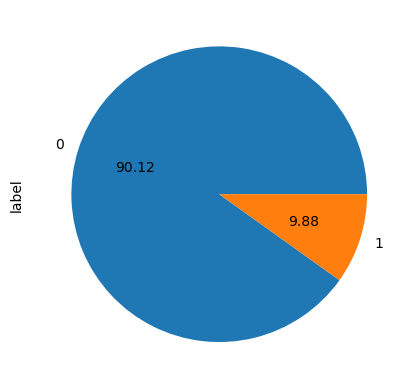

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='label'>

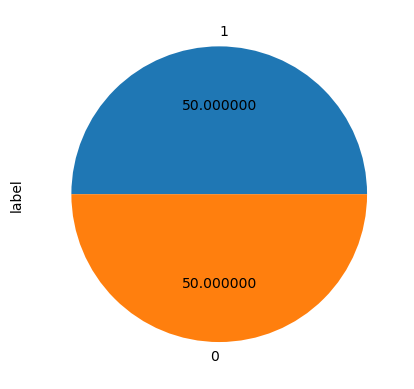

In [ ]:
#applying "random_over_sampling" to deal with imbalanced data

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
X_res,y_res=ros.fit_resample(X,y)
y_res.value_counts().plot.pie(autopct="%2f")

In [ ]:
y_res.value_counts()

1    1249
0    1249
Name: label, dtype: int64

# Connecting MYsql

Connecting mysel and perform some data analysis.!

In [ ]:
mysql=lambda q: sqldf(q,globals())

In [ ]:
from pandasql import sqldf 

In [ ]:
mysql("""select * from credit_card""")

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label,Age,Working_Period
0,5008827,M,Y,Y,0,180000.000000,Pensioner,Higher education,Married,House / apartment,1,0,0,0,2,1,51.000000,1
1,5009744,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.000000,1
2,5009746,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,43.417155,1
3,5009749,F,Y,N,0,189478.079604,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.000000,1
4,5009753,F,Y,N,0,315000.000000,Pensioner,Higher education,Married,House / apartment,1,1,1,0,2,1,37.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,5118268,M,Y,N,1,360000.000000,State servant,Secondary / secondary special,Married,House / apartment,1,0,1,0,3,0,30.000000,9
1382,5028645,F,N,Y,0,189478.079604,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,2,0,32.000000,5
1383,5023655,F,N,N,0,225000.000000,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,1,0,28.000000,3
1384,5118219,M,Y,N,0,270000.000000,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,2,0,41.000000,1


In [ ]:
# Group the customers based on their income type and find the average of their annual income.!

mysql("""select Type_Income as Income_Type,avg(Annual_income)as Avg_Anual_Salary,count(*)as Customer_Count
      from credit_card group by Type_Income""")

,Income_Type,Avg_Anual_Salary,Customer_Count
0,Commercial associate,225687.953445,330
1,Pensioner,154846.174769,245
2,State servant,207267.326733,101
3,Working,182068.001233,710


In [ ]:
#Find the female owners of cars and property.

mysql("""select GENDER,Car_Owner,Propert_Owner from credit_card where GENDER="F" and Car_Owner="Y" and Propert_Owner="Y" """)

,GENDER,Car_Owner,Propert_Owner
0,F,Y,Y
1,F,Y,Y
2,F,Y,Y
3,F,Y,Y
4,F,Y,Y
...,...,...,...
150,F,Y,Y
151,F,Y,Y
152,F,Y,Y
153,F,Y,Y


In [ ]:
# Find the male customers who are staying with their families.

mysql("""select GENDER,Family_Members from credit_card where GENDER="M" and Family_Members>1 """)

,GENDER,Family_Members
0,M,2
1,M,3
2,M,3
3,M,3
4,M,2
...,...,...
417,M,4
418,M,2
419,M,2
420,M,3


In [ ]:
#Please list the top five people having the highest income.

mysql("""select Ind_ID,Annual_income from credit_card order by Annual_income desc limit 5 """)

,Ind_ID,Annual_income
0,5143231,1575000.0
1,5090470,900000.0
2,5079016,900000.0
3,5116005,900000.0
4,5148669,810000.0


In [ ]:
# How many married people are having bad credit?

mysql("""select Marital_status,label as Bad_Credit,count(*)as Total_Count from credit_card 
where Marital_status="Married" and label=1 """)

,Marital_status,Bad_Credit,Total_Count
0,Married,1,87


In [ ]:
# What is the highest education level and what is the total count?

mysql("""select EDUCATION,count(*) from credit_card group by EDUCATION """)

,EDUCATION,count(*)
0,Academic degree,2
1,Higher education,374
2,Incomplete higher,61
3,Lower secondary,18
4,Secondary / secondary special,931


In [ ]:
mysql("""select EDUCATION,count(*) from credit_card where EDUCATION="Higher education" group by EDUCATION""")

,EDUCATION,count(*)
0,Higher education,374


In [ ]:
# Between married males and females, who is having more bad credit?

mysql("""select Marital_status,GENDER,label as Bad_Credit,count(GENDER) over(partition by GENDER) as count
         from credit_card
         where Marital_status="Married" and label=1""")

,Marital_status,GENDER,Bad_Credit,count
0,Married,F,1,50
1,Married,F,1,50
2,Married,F,1,50
3,Married,F,1,50
4,Married,F,1,50
...,...,...,...,...
82,Married,M,1,37
83,Married,M,1,37
84,Married,M,1,37
85,Married,M,1,37


# Machine learning approach

In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 5008827 to 5053790
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   GENDER          1386 non-null   category
 1   Car_Owner       1386 non-null   category
 2   Propert_Owner   1386 non-null   category
 3   CHILDREN        1386 non-null   int64   
 4   Annual_income   1386 non-null   float64 
 5   Type_Income     1386 non-null   category
 6   EDUCATION       1386 non-null   category
 7   Marital_status  1386 non-null   category
 8   Housing_type    1386 non-null   category
 9   Mobile_phone    1386 non-null   category
 10  Work_Phone      1386 non-null   category
 11  Phone           1386 non-null   category
 12  EMAIL_ID        1386 non-null   category
 13  Family_Members  1386 non-null   int64   
 14  label           1386 non-null   int64   
 15  Age             1386 non-null   float64 
 16  Working_Period  1386 non-null   int64   
dtypes: ca

In [ ]:
# Separate target from features
y = credit_card['label']
features = credit_card.drop(['label'], axis=1)
# Preview features
features.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Age,Working_Period
Ind_ID,,,,,,,,,,,,,,,,
5008827,M,Y,Y,0,180000.000000,Pensioner,Higher education,Married,House / apartment,1,0,0,0,2,51.000000,1
5009744,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,37.000000,1
5009746,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,43.417155,1
5009749,F,Y,N,0,189478.079604,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,37.000000,1
5009753,F,Y,N,0,315000.000000,Pensioner,Higher education,Married,House / apartment,1,1,1,0,2,37.000000,1


# Convert the categorical data 

In [ ]:
#using ordinal encoding

object_cols = ["GENDER","Car_Owner","Propert_Owner","Type_Income","EDUCATION",
                "Marital_status","Housing_type","Mobile_phone","Work_Phone","Phone",
                "EMAIL_ID","CHILDREN","Family_Members","Working_Period"]

X = features.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])


In [ ]:
X.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Age,Working_Period
Ind_ID,,,,,,,,,,,,,,,,
5008827,1.0,1.0,1.0,0.0,180000.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,51.000000,1.0
5009744,0.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,37.000000,1.0
5009746,0.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,43.417155,1.0
5009749,0.0,1.0,0.0,0.0,189478.079604,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,37.000000,1.0
5009753,0.0,1.0,0.0,0.0,315000.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,37.000000,1.0


In [ ]:
X.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members',
       'Age', 'Working_Period'],
      dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 5008827 to 5053790
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          1386 non-null   float64
 1   Car_Owner       1386 non-null   float64
 2   Propert_Owner   1386 non-null   float64
 3   CHILDREN        1386 non-null   float64
 4   Annual_income   1386 non-null   float64
 5   Type_Income     1386 non-null   float64
 6   EDUCATION       1386 non-null   float64
 7   Marital_status  1386 non-null   float64
 8   Housing_type    1386 non-null   float64
 9   Mobile_phone    1386 non-null   float64
 10  Work_Phone      1386 non-null   float64
 11  Phone           1386 non-null   float64
 12  EMAIL_ID        1386 non-null   float64
 13  Family_Members  1386 non-null   float64
 14  Age             1386 non-null   float64
 15  Working_Period  1386 non-null   float64
dtypes: float64(16)
memory usage: 184.1 KB


# Implement Model

#  LogisticRegression !

In [ ]:
#splitting the data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=16)

In [ ]:
logistic_reg=LogisticRegression(random_state = 0)

In [ ]:
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.5

# K-Nearest Neighbor(KNN) 

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[247   2]
 [ 29   0]]
0.8884892086330936


# Random Forest

In [ ]:
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

In [ ]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [ ]:
# Output
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [ ]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[246,   3],
       [ 24,   5]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       249
           1       0.71      0.34      0.47        29

    accuracy                           0.92       278
   macro avg       0.82      0.66      0.71       278
weighted avg       0.91      0.92      0.90       278



# XG Boost Classifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [ ]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[245,   4],
       [ 19,  10]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       249
           1       0.71      0.34      0.47        29

    accuracy                           0.92       278
   macro avg       0.82      0.66      0.71       278
weighted avg       0.91      0.92      0.90       278



# Conclusion

In [ ]:
Logestic Regression :50%
K-Nearest Neighbor(KNN) :88%
Random forest Algorithm :92%
XGBoost Classifier :92%

From above model we can say that "Random_Forest" and "XGBoost Classifier" best suited model for the data set.